<img src="CFG_logo.png" width="125">

<h1><center> Big Data Challenge: Sustainability in a Post-Covid World </h1></center>

#### The following analysis will help the Emergent Alliance, IBM and R$^2$ Data Labs understand:
1. How did the economy react when businesses had to close? 
2. Were some sectors (for instance energy production) more afffected than others? 
3. Is there a particular impact onto the economy and energy usage levels? 

<img src="EmergentAlliance_logo.jpg" width="225">
<img src="R2DataLabs_logo.jpg" width="250">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Function for loading Excel data:

In [3]:
def load_excel_data(path, sheet_name=None, index_col=0):
    '''Load specified data set from an Excel sheet
    
    Args:
        path (str): The location of the Excel file.
        sheet_name (str or int or list): Specify which Excel sheet to load, can be sheet name, number (starting at 0) or list of sheets.
        index_col (int): Specify what index header are on.
    
    Returns:
        data: n rows from the dataframe.
    '''
    excel_df = pd.read_excel(path, sheet_name, index_col)
    return excel_df

---------------------------------------------------------------------------------------------------------------------------
### 3) Is there a particular impact onto the economy and energy usage levels? 

#### Analysis of the April, May, June 2020 energy demand compared to same period in 2019 from Major Power Producers and Sustainable Renewables (Table 5.3 in Excel)

In [4]:
elec_gen_by_MPP_Q2_months = load_excel_data('ET_5.3_AUG_20.xls', sheet_name='Month', index_col=3)
elec_gen_by_MPP_Q2_months

,Unnamed: 0,Unnamed: 1,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [5]:
# Rename unlabled columns from the data set

elec_gen_by_MPP_Q2_months_clean = elec_gen_by_MPP_Q2_months.rename(columns = {'Unnamed: 0':'Year', 'Unnamed: 1':'Month'})
elec_gen_by_MPP_Q2_months_clean

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,January,6.300000,3.495000,0.358300,0.874000,1.512000,0.050300,..,..,..
2,1995,February,6.257000,3.437000,0.343000,0.829000,1.589000,0.048600,..,..,..
3,1995,March*,7.443000,4.139000,0.380800,0.947000,1.912000,0.050800,..,..,..
4,1995,April,5.320000,2.560000,0.179800,0.756000,1.776000,0.038800,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...
303,2020,March,3.734560,0.158407,0.012067,1.577485,0.845854,0.050180,0.567809,0.487725,0.0350337
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [6]:
# Create a seperate dataframe with just April, May and June 2020 data

elec_gen_by_MPP_2020 = elec_gen_by_MPP_Q2_months_clean[elec_gen_by_MPP_Q2_months_clean['Year']==2020]
elec_gen_by_MPP_2020_amj = elec_gen_by_MPP_2020.iloc[3:6]
elec_gen_by_MPP_2020_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
304,2020,April,3.030282,0.044485,0.007019,1.165947,0.948713,0.025804,0.345542,0.442426,0.0503458
305,2020,May,3.044369,0.019191,0.005774,1.105274,1.030223,0.020148,0.322117,0.480496,0.0611457
306,2020,June,3.085639,0.039362,0.005563,1.346934,0.821137,0.019213,0.340155,0.46688,0.0463951


In [7]:
# Create a seperate dataframe with just April, May and June 2019 data

elec_gen_by_MPP_2019 = elec_gen_by_MPP_Q2_months_clean[elec_gen_by_MPP_Q2_months_clean['Year']==2019]
elec_gen_by_MPP_2019_amj = elec_gen_by_MPP_2019.iloc[3:6]
elec_gen_by_MPP_2019_amj

,Year,Month,Total,Coal,Oil,Gas,Nuclear,Hydro,Wind,Bioenergy,Solar
292,2019,April,3.795566,0.081211,0.009096,1.771330,1.148695,0.018422,0.349022,0.378409,0.0393808
293,2019,May,3.684179,0.015821,0.010125,1.781089,1.141701,0.011291,0.23311,0.445232,0.045809
294,2019,June,3.303601,0.030337,0.009709,1.685580,0.791767,0.019667,0.30761,0.418889,0.040042


In [8]:
# Create a dataframe with just April, May and June 2019 and 2020 data

elec_gen_by_MPP_2019_2020_amj = pd.concat([elec_gen_by_MPP_2019_amj, elec_gen_by_MPP_2020_amj])
elec_gen_by_MPP_2019_2020_amj.set_index(['Year', 'Month'])

Total      Coal       Oil       Gas   Nuclear     Hydro  \
Year Month                                                               
2019 April  3.795566  0.081211  0.009096  1.771330  1.148695  0.018422   
     May    3.684179  0.015821  0.010125  1.781089  1.141701  0.011291   
     June   3.303601  0.030337  0.009709  1.685580  0.791767  0.019667   
2020 April  3.030282  0.044485  0.007019  1.165947  0.948713  0.025804   
     May    3.044369  0.019191  0.005774  1.105274  1.030223  0.020148   
     June   3.085639  0.039362  0.005563  1.346934  0.821137  0.019213   

                Wind Bioenergy      Solar  
Year Month                                 
2019 April  0.349022  0.378409  0.0393808  
     May     0.23311  0.445232   0.045809  
     June    0.30761  0.418889   0.040042  
2020 April  0.345542  0.442426  0.0503458  
     May    0.322117  0.480496  0.0611457  
     June   0.340155   0.46688  0.0463951

#### Multiple plots showing the comparison between energy generation fuels in April, May and June 2019 vs 2020

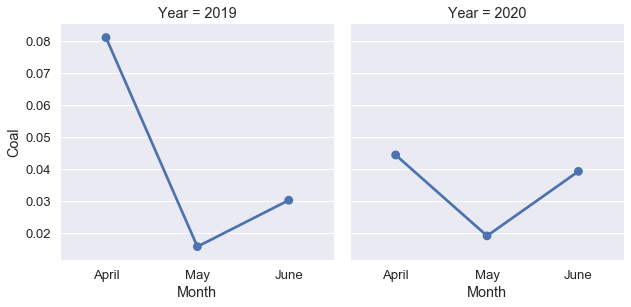

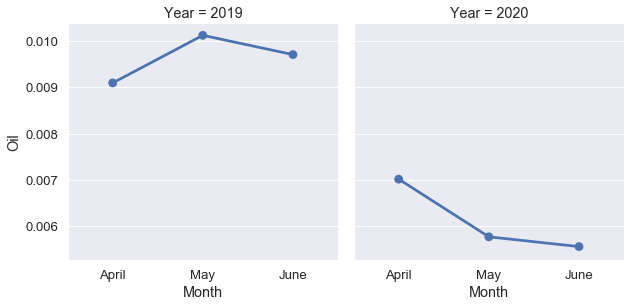

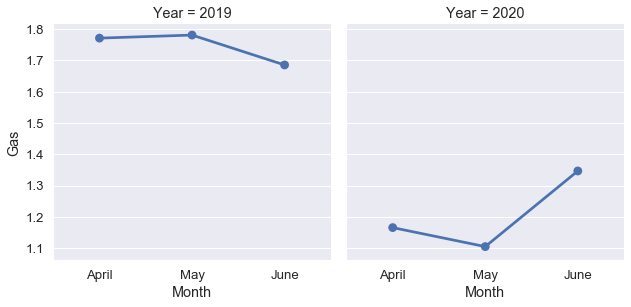

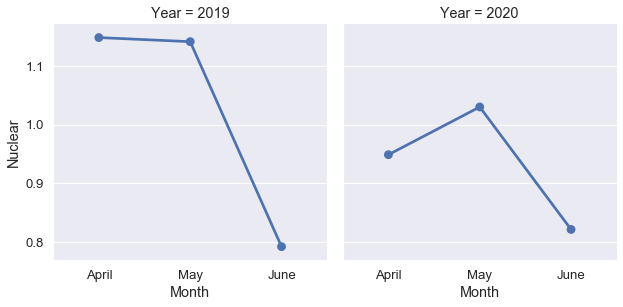

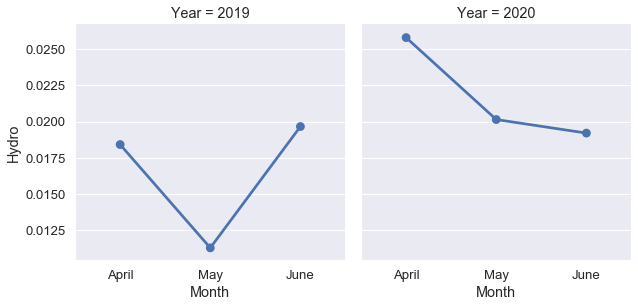

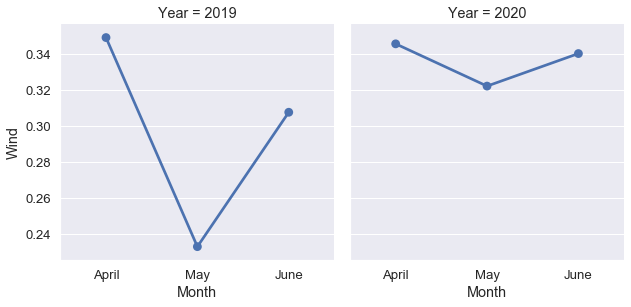

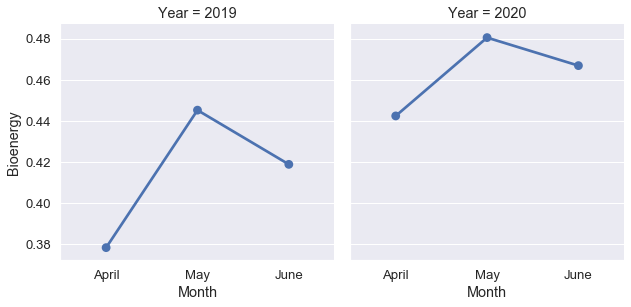

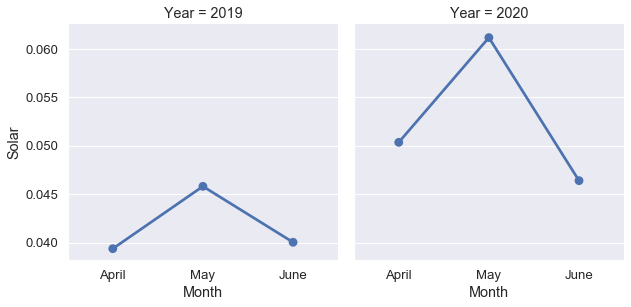

In [9]:
sns.set(font_scale=1.2)

order = ['April', 'May', 'June']

for col in elec_gen_by_MPP_2019_2020_amj.columns[3:]:
    elec_gen_by_MPP_2019_2020_amj_plot = sns.FacetGrid(elec_gen_by_MPP_2019_2020_amj, col='Year', height=4.5, aspect=1)
    elec_gen_by_MPP_2019_2020_amj_plot.map(sns.pointplot, 'Month', col, order=order)


#### Plot showing the comparison between total energy generation from fuels in April, May and June 2019 vs 2020 

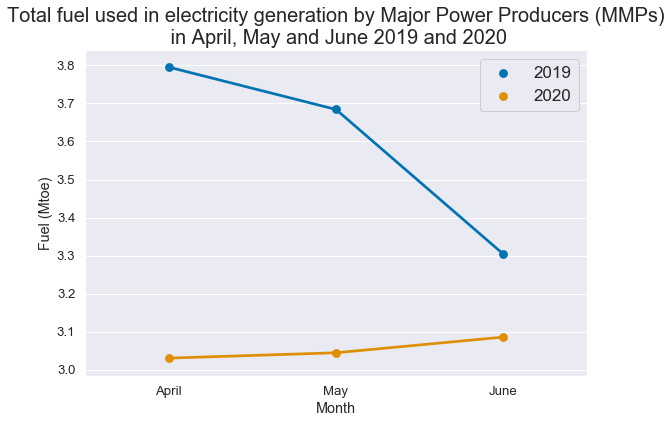

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
sns.set(font_scale=1.2)

sns.pointplot(data=elec_gen_by_MPP_2019_2020_amj, x='Month', y='Total', hue='Year', palette='colorblind', ax=ax)

ax.set(xlabel='Month', ylabel='Fuel (Mtoe)')
ax.set_title('Total fuel used in electricity generation by Major Power Producers (MMPs)\n in April, May and June 2019 and 2020', fontsize=20)

ax.legend(prop={'size': 17}, framealpha=1.0)

In [13]:
elec_gen_by_MPP_2019_amj['Total'].describe()

count    3.000000
mean     3.594449
std      0.257965
min      3.303601
25%      3.493890
50%      3.684179
75%      3.739873
max      3.795566
Name: Total, dtype: float64

In [14]:
elec_gen_by_MPP_2020_amj['Total'].describe()

count    3.000000
mean     3.053430
std      0.028770
min      3.030282
25%      3.037325
50%      3.044369
75%      3.065004
max      3.085639
Name: Total, dtype: float64

Function for calculating the difference of various statistics from the data:

In [42]:
def difference(num1, num2, func):
    ''' Calculate the numerical difference between 2 statistics.
    
    Args:
        num1 (float): The first number.
        num2 (float): The second number. 
        func (function): Function to operate on both numbers. 
        
    Returns:
        Numerical difference between a function of num1 and num2.
    '''
    return func(num1) - func(num2)

In [43]:
# Mean difference
elec_gen_by_MPP_2019_2020_amj_mean = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.mean)

# Minimum difference 
elec_gen_by_MPP_2019_2020_amj_min = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.min)

# Maximum difference
elec_gen_by_MPP_2019_2020_amj_max = difference(elec_gen_by_MPP_2020_amj['Total'], elec_gen_by_MPP_2019_amj['Total'], np.max)

In [40]:
# IQR difference
elec_gen_by_MPP_2020_amj_q75, elec_gen_by_MPP_2020_amj_q25 = np.percentile(elec_gen_by_MPP_2020_amj['Total'], [75, 25])
elec_gen_by_MPP_2019_amj_q75, elec_gen_by_MPP_2019_amj_q25 = np.percentile(elec_gen_by_MPP_2019_amj['Total'], [75, 25])

elec_gen_by_MPP_2020_amj_IQR = elec_gen_by_MPP_2020_amj_q75 - elec_gen_by_MPP_2020_amj_q25
elec_gen_by_MPP_2019_amj_IQR = elec_gen_by_MPP_2019_amj_q75 - elec_gen_by_MPP_2019_amj_q25

elec_gen_by_MPP_2019_2020_amj_IQR = elec_gen_by_MPP_2020_amj_IQR - elec_gen_by_MPP_2019_amj_IQR

Function for calculating the percentage difference of various statistics from the data:

In [64]:
def percentage_diff(diff, num1, func):
    ''' Calculate the percentage difference between 2 statistics.
    
    Args:
        diff (float): The numerical difference between the two numbers we want the percentage difference of.
        num1 (float): The original number used when calculating the difference.
        func (function): Function to operate on the original number. 
        
    Returns:
        Percentage difference.
    '''
    perc_diff = (diff / func(num1)) * 100
    return perc_diff

In [77]:
# Mean percentage difference
elec_gen_by_MPP_2019_2020_amj_mean_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2020_amj['Total'], np.mean)

# Minimum percentage difference
elec_gen_by_MPP_2019_2020_amj_max_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2020_amj['Total'], np.min)

# Maximum percentage difference
elec_gen_by_MPP_2019_2020_amj_min_pd = percentage_diff(elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2020_amj['Total'], np.max)

# IQR percentage difference
elec_gen_by_MPP_2019_2020_amj_IQR_pd = (elec_gen_by_MPP_2019_2020_amj_IQR / elec_gen_by_MPP_2020_amj_IQR) * 100

In [76]:
# Create a dataframe for the summary statistics of April, May and June 2019 and 2020

elec_gen_by_MPP_2019_2020_amj_stats = {
    'Statistic': ['Mean', 'Minimum', 'Maximum', 'IQR'],
    'Difference': [elec_gen_by_MPP_2019_2020_amj_mean, elec_gen_by_MPP_2019_2020_amj_min, elec_gen_by_MPP_2019_2020_amj_max, elec_gen_by_MPP_2019_2020_amj_IQR],
    '% Difference': [elec_gen_by_MPP_2019_2020_amj_mean_pd, elec_gen_by_MPP_2019_2020_amj_max_pd, elec_gen_by_MPP_2019_2020_amj_min_pd, elec_gen_by_MPP_2019_2020_amj_IQR_pd]
}

elec_gen_by_MPP_2019_2020_amj_stats_df = pd.DataFrame(elec_gen_by_MPP_2019_2020_amj_stats).set_index('Statistic')

#### From April, May and June 2019 to 2020, the total fuel used in electricity generation by MMPs overall decreased. The following statistics summarise the quantitive analysis:

In [75]:
elec_gen_by_MPP_2019_2020_amj_stats_df

,Difference,% Difference
Statistic,,
Mean,-0.541019,-17.718389
Minimum,-0.273319,-9.019590
Maximum,-0.709927,-23.007446
IQR,-0.218304,-788.704328
